# Continuous Methods

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

### TL;DR
How to detect anomalies/outliers in continuous data:
- Visualize
- Use Z-score (for normally distributed data)
- Use IQR method 


### Visualize:

#### Ascombe's Quartet:

In [ ]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

In [ ]:
# peek at the head, what this data set looks like
df.head()

In [ ]:
# check out the stats with a .describe()
df.groupby('dataset')[['x', 'y']].describe()

In [ ]:
# plot the data
sns.relplot(x='x', y='y', col='dataset', data=df)

In [ ]:
# load up the swiss data set
df = data('swiss')

In [ ]:
df.head()

In [ ]:
# get the stats via describe
df.describe()

In [ ]:
df.info()

In [ ]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

In [ ]:
sns.pairplot(df)

### Using Z-score
- How far is an observation from mean?

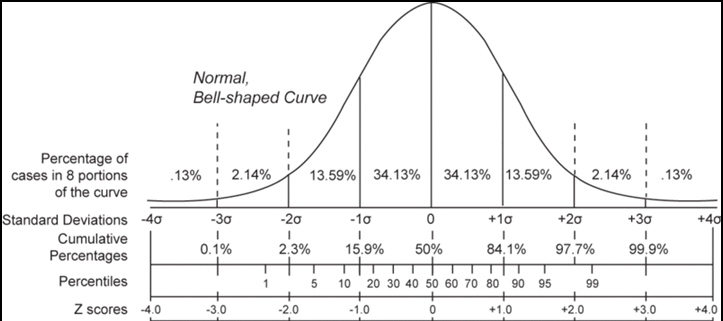

source: https://en.wikipedia.org/wiki/File:Normal_distribution_and_scales.gif

### Exponential Tails of the Normal Distribution
| Range | Expected Fraction of Population Inside Range | Approximate Expected Frequency Outside Range | Approximate frequency for daily event |
| ----- | -------------------------------------------- | -------------------------------------------- | -------------------------------------------- |
| μ ± 0.5σ | 0.382924922548026                            | 2 in 3 |Four or five times a week|
| μ ± σ | 0.682689492137086 | 1 in 3 |Twice a week|
| μ ± 1.5σ | 0.866385597462284 | 1 in 7 |Weekly|
| μ ± 2σ | 0.954499736103642 | 1 in 22 |Every three weeks|
| μ ± 2.5σ | 0.987580669348448 | 1 in 81 |Quarterly|
| μ ± 3σ | 0.997300203936740 | 1 in 370 |Yearly|
| μ ± 3.5σ | 0.999534741841929 | 1 in 2149 |Every 6 years|
| μ ± 4σ | 0.999936657516334 | 1 in 15,787 |Every 43 years|
| μ ± 4.5σ | 0.999993204653751 | 1 in 147,160 |Every 403 years|
| μ ± 5σ | 0.999999426696856 | 1 in 744,278 |Every 4776 years|
| μ ± 5.5σ | 0.999999962020875 | 1 in 26,330,254 |Every 72,090 years|
| μ ± 6σ | 0.999999998026825 | 1 in 506,797,346 |Every 1.38 million years|

### Beware: "Black Swan" events

- Phenomenally low frequency events that have an exponentially powerful impact
- Is outlier (outside the realm of our expectation)
- Has major impact
- predictable (atleast in hindsight)
- Examples ?

In [ ]:
# z-score:
# subtract from the mean, divide by the standard deviation
# i.e (x - x_mean) / x_std

df['inf_mort_zs'] = ((df['Infant.Mortality'] - df['Infant.Mortality'].mean())
                     / df['Infant.Mortality'].std())
df.head()

In [ ]:
# Which provinces have very high/low infant mortality

df[df['inf_mort_zs'].abs() >= 3]

### Using IQR

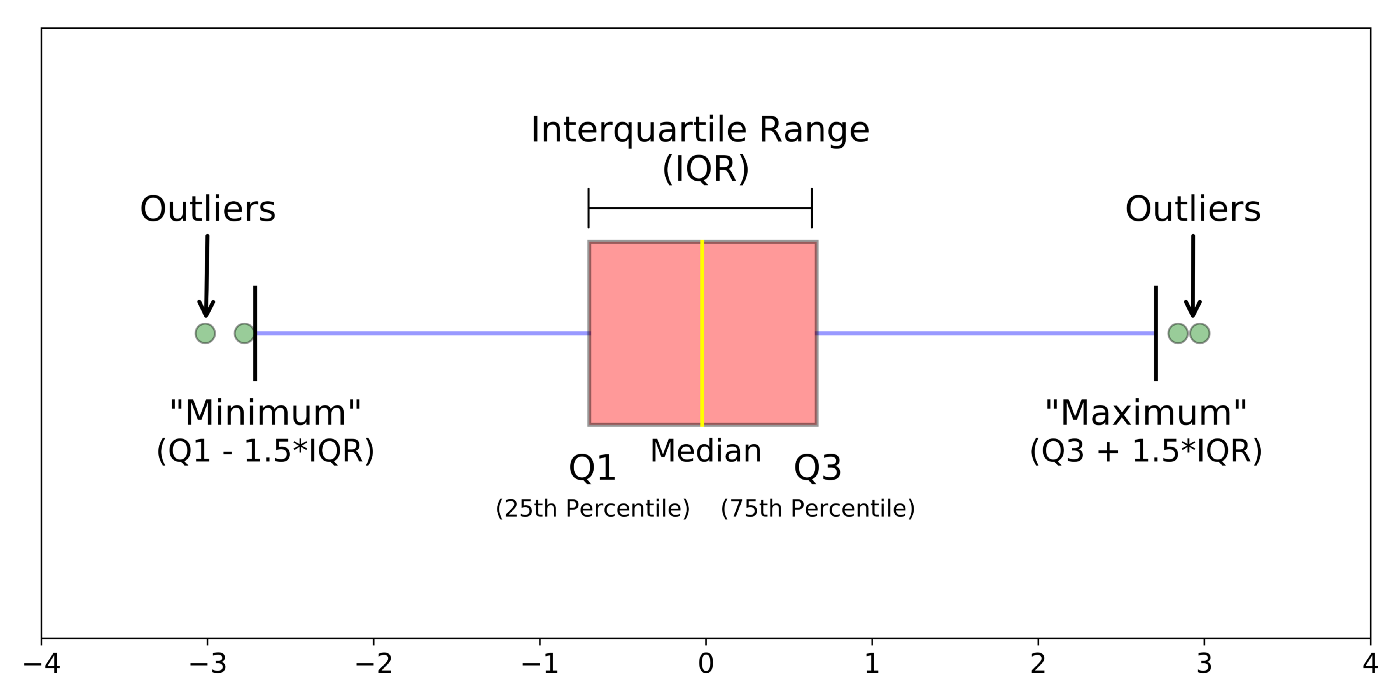

source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [ ]:
# steps to defining IQR/Tukey method:
# get the Q1 and Q3 values
# determine our multiplier
# use these qualities to assert abnormalities

In [ ]:
# infant mortality
multiplier = 1.5
q1 = df['Infant.Mortality'].quantile(0.25)
q3 = df['Infant.Mortality'].quantile(0.75)

In [ ]:
# calculate iqr
iqr = q3 - q1

In [ ]:
# calculate upper and lower limits for the whiskers
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [ ]:
# which observations in dataframe are outliers based on IQR rule?
df[(df['Infant.Mortality'] < inner_lower_fence) | (df['Infant.Mortality'] > inner_upper_fence)]